In [ ]:
import os 

if os.path.exists("/content/dataset/img_dir/ISIC2018_Task1-2_Training_Input") == False:
    !wget https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task1-2_Training_Input.zip
    !unzip /content/ISIC2018_Task1-2_Training_Input.zip
    !wget https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task1-2_Test_Input.zip
    !unzip /content/ISIC2018_Task1-2_Test_Input.zip
    !wget https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task1_Test_GroundTruth.zip
    !unzip /content/ISIC2018_Task1_Test_GroundTruth.zip
    !wget https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task1_Training_GroundTruth.zip
    !unzip /content/ISIC2018_Task1_Training_GroundTruth.zip
    !wget https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task1-2_Validation_Input.zip
    !unzip /content/ISIC2018_Task1-2_Validation_Input.zip
    !wget https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task1_Validation_GroundTruth.zip
    !unzip /content/ISIC2018_Task1_Validation_GroundTruth.zip

    !rm ISIC2018_Task1-2_Test_Input.zip ISIC2018_Task1-2_Training_Input.zip ISIC2018_Task1_Test_GroundTruth.zip  ISIC2018_Task1_Training_GroundTruth.zip

    !mkdir dataset
    %cd dataset
    !mkdir img_dir
    !mkdir ann_dir
    %cd /content
    !mv /content/ISIC2018_Task1-2_Training_Input /content/dataset/img_dir
    !mv /content/ISIC2018_Task1-2_Test_Input /content/dataset/img_dir
    !mv /content/ISIC2018_Task1-2_Validation_Input /content/dataset/img_dir

    !mv /content/ISIC2018_Task1_Training_GroundTruth /content/dataset/ann_dir
    !mv /content/ISIC2018_Task1_Test_GroundTruth /content/dataset/ann_dir
    !mv /content/ISIC2018_Task1_Validation_GroundTruth /content/dataset/ann_dir

--2023-05-15 10:29:11--  https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task1-2_Test_Input.zip
Resolving isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)... 52.217.128.249, 52.217.226.41, 52.216.100.27, ...
Connecting to isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)|52.217.128.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2370457338 (2.2G) [application/zip]
Saving to: ‘ISIC2018_Task1-2_Test_Input.zip’

ISIC2018_Task1-2_Te 100%[===================>]   2.21G  82.5MB/s    in 28s     

2023-05-15 10:29:39 (81.3 MB/s) - ‘ISIC2018_Task1-2_Test_Input.zip’ saved [2370457338/2370457338]

Archive:  /content/ISIC2018_Task1-2_Test_Input.zip
   creating: ISIC2018_Task1-2_Test_Input/
  inflating: ISIC2018_Task1-2_Test_Input/ATTRIBUTION.txt  
  inflating: ISIC2018_Task1-2_Test_Input/ISIC_0012169.jpg  
  inflating: ISIC2018_Task1-2_Test_Input/ISIC_0012236.jpg  
  inflating: ISIC2018_Task1-2_Test_Input/

Install MMSegmentation

In [ ]:
# Install PyTorch
!conda install pytorch==1.12.0 torchvision==0.13.0 torchaudio==0.12.0 cudatoolkit=11.3 -c pytorch
# Install mim
!pip install -U openmim
# Install mmengine

!mim install mmengine
# Install MMCV
!mim install 'mmcv >= 2.0.0rc1'

/bin/bash: conda: command not found
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 2.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 372.1/372.1 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.9/200.9 kB 27.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.4/74.4 MB 5.5 MB/s eta 0:00:00


In [ ]:
!rm -rf mmsegmentation
!git clone https://github.com/open-mmlab/mmsegmentation.git 
%cd mmsegmentation
!pip install -e .
# %cd ../

Cloning into 'mmsegmentation'...
remote: Enumerating objects: 14973, done.
remote: Counting objects: 100% (547/547), done.
remote: Compressing objects: 100% (399/399), done.
remote: Total 14973 (delta 199), reused 331 (delta 131), pack-reused 14426
Receiving objects: 100% (14973/14973), 20.21 MiB | 28.32 MiB/s, done.
Resolving deltas: 100% (10517/10517), done.
/content/mmsegmentation
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/mmsegmentation
  Preparing metadata (setup.py) ... done
  Running setup.py develop for mmsegmentation


In [ ]:
# Check MMSegmentation installation
import mmseg
print(mmseg.__version__)

1.0.0


In [ ]:
%cd ../
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection
!pip install -e .

/content
Cloning into 'mmdetection'...
remote: Enumerating objects: 36083, done.
remote: Counting objects: 100% (737/737), done.
remote: Compressing objects: 100% (374/374), done.
remote: Total 36083 (delta 376), reused 630 (delta 354), pack-reused 35346
Receiving objects: 100% (36083/36083), 52.11 MiB | 35.93 MiB/s, done.
Resolving deltas: 100% (25314/25314), done.
/content/mmdetection
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/mmdetection
  Preparing metadata (setup.py) ... done
  Running setup.py develop for mmdet


In [ ]:
import mmdet
print(mmdet.__version__)

3.0.0


In [ ]:
!pwd
%cd ../

/content/mmdetection
/content


Customize dataset

In [ ]:
from mmseg.registry import DATASETS
from mmseg.datasets import BaseSegDataset

classes = ('outside', 'inside')
palette = [[0, 0, 0], [255, 255, 255]]

@DATASETS.register_module()
class ISICTask1Dataset(BaseSegDataset):
  METAINFO = dict(classes = classes, palette = palette)
  def __init__(self, **kwargs):
    super().__init__(img_suffix='.jpg', seg_map_suffix='_segmentation.png', **kwargs)

In [ ]:
%cd mmsegmentation

/content/mmsegmentation


CONFIG

In [ ]:
from mmengine import Config
cfg = Config.fromfile('/content/mmsegmentation/configs/mask2former/mask2former_r50_8xb2-160k_ade20k-512x512.py')
print(f'Config:\n{cfg.pretty_text}')

Config:
default_scope = 'mmseg'
env_cfg = dict(
    cudnn_benchmark=True,
    mp_cfg=dict(mp_start_method='fork', opencv_num_threads=0),
    dist_cfg=dict(backend='nccl'))
vis_backends = [dict(type='LocalVisBackend')]
visualizer = dict(
    type='SegLocalVisualizer',
    vis_backends=[dict(type='LocalVisBackend')],
    name='visualizer')
log_processor = dict(by_epoch=False)
log_level = 'INFO'
load_from = None
resume = False
tta_model = dict(type='SegTTAModel')
dataset_type = 'ADE20KDataset'
data_root = 'data/ade/ADEChallengeData2016'
crop_size = (512, 512)
train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations', reduce_zero_label=True),
    dict(
        type='RandomChoiceResize',
        scales=[
            256, 307, 358, 409, 460, 512, 563, 614, 665, 716, 768, 819, 870,
            921, 972, 1024
        ],
        resize_type='ResizeShortestEdge',
        max_size=2048),
    dict(type='RandomCrop', crop_size=(512, 512), cat_max_ratio=0.75),
    dict(t

In [ ]:
# modify num classes of file config

cfg.num_classes = 2
# Modify dataset type and batch
cfg.dataset_type = 'ISICTask1Dataset'

cfg.data_root = '/content/dataset'
# change num_workers
cfg.train_dataloader.batch_size = 2
cfg.train_dataloader.num_workers = 2
cfg.val_dataloader.num_workers = 1
cfg.test_dataloader.num_workers = 2


cfg.train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations'),
    dict(type='RandomCrop', crop_size=cfg.crop_size, cat_max_ratio=0.75),
    dict(type='RandomFlip', prob=0.5),
    dict(type='PackSegInputs')
]

cfg.test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations'),
    dict(type='PackSegInputs')
]

cfg.train_dataloader.dataset.type = cfg.dataset_type
cfg.train_dataloader.dataset.data_root = cfg.data_root
cfg.train_dataloader.dataset.data_prefix = dict(img_path='img_dir/ISIC2018_Task1-2_Training_Input', seg_map_path='ann_dir/ISIC2018_Task1_Training_GroundTruth')
cfg.train_dataloader.dataset.pipeline = cfg.train_pipeline

cfg.val_dataloader.dataset.type = cfg.dataset_type
cfg.val_dataloader.dataset.data_root = cfg.data_root
cfg.val_dataloader.dataset.data_prefix = dict(img_path='img_dir/ISIC2018_Task1-2_Validation_Input', seg_map_path='ann_dir/ISIC2018_Task1_Validation_GroundTruth')
cfg.val_dataloader.dataset.pipeline = cfg.test_pipeline

cfg.test_dataloader.dataset.type = cfg.dataset_type
cfg.test_dataloader.dataset.data_root = cfg.data_root
cfg.test_dataloader.dataset.data_prefix = dict(img_path='img_dir/ISIC2018_Task1-2_Test_Input', seg_map_path='ann_dir/ISIC2018_Task1_Test_GroundTruth')
cfg.test_dataloader.dataset.pipeline = cfg.test_pipeline

cfg.load_from = "https://download.openmmlab.com/mmsegmentation/v0.5/mask2former/mask2former_r50_8xb2-160k_ade20k-512x512/mask2former_r50_8xb2-160k_ade20k-512x512_20221204_000055-2d1f55f1.pth"
# Set up working dir to save files and logs.
cfg.work_dir = './work_dirs/tutorial'

cfg.train_cfg = dict(
    type='EpochBasedTrainLoop', max_epochs=5, val_begin=1, val_interval=1000)
# cfg.train_cfg = dict(
#     type='IterBasedTrainLoop', max_iters=300, val_interval=1)


cfg.param_scheduler = [
    dict(type='LinearLR', by_epoch=False, start_factor=0.1, begin=0, end=100),
    dict(
        type='PolyLR',
        eta_min=0.0001,
        power=0.9,
        begin=0,
        end=160,
        by_epoch=False)
]
cfg.default_hooks = dict(
    timer=dict(type='IterTimerHook'),
    logger=dict(type='LoggerHook', interval=50, log_metric_by_epoch=False),
    param_scheduler=dict(type='ParamSchedulerHook'),
    checkpoint=dict(type='CheckpointHook', interval = 250, by_epoch=False),
    sampler_seed=dict(type='DistSamplerSeedHook'))
cfg.dump('/content/mmsegmentation/configs/tiensiha.py')
cfg.log_processor = dict(by_epoch=True)
cfg['randomness'] = dict(seed=48)

In [ ]:
from mmengine.runner import Runner

runner = Runner.from_cfg(cfg)

In [ ]:
runner.train()

05/15 09:38:50 - mmengine - INFO - paramwise_options -- backbone.conv1.weight:lr=1e-05
05/15 09:38:50 - mmengine - INFO - paramwise_options -- backbone.conv1.weight:weight_decay=0.05
05/15 09:38:50 - mmengine - INFO - paramwise_options -- backbone.conv1.weight:lr_mult=0.1
05/15 09:38:50 - mmengine - INFO - paramwise_options -- backbone.conv1.weight:decay_mult=1.0
05/15 09:38:50 - mmengine - INFO - paramwise_options -- backbone.layer1.0.conv1.weight:lr=1e-05
05/15 09:38:50 - mmengine - INFO - paramwise_options -- backbone.layer1.0.conv1.weight:weight_decay=0.05
05/15 09:38:50 - mmengine - INFO - paramwise_options -- backbone.layer1.0.conv1.weight:lr_mult=0.1
05/15 09:38:50 - mmengine - INFO - paramwise_options -- backbone.layer1.0.conv1.weight:decay_mult=1.0
05/15 09:38:50 - mmengine - INFO - paramwise_options -- backbone.layer1.0.conv2.weight:lr=1e-05
05/15 09:38:50 - mmengine - INFO - paramwise_options -- backbone.layer1.0.conv2.weight:weight_decay=0.05
05/15 09:38:50 - mmengine - INF

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


05/15 09:39:26 - mmengine - INFO - Epoch(train) [1][  50/1297]  lr: 5.6271e-05  eta: 1:13:06  time: 0.4945  data_time: 0.0066  memory: 10651  grad_norm: 911.2251  loss: 33.7393  decode.loss_cls: 0.9866  decode.loss_mask: 1.3580  decode.loss_dice: 0.8927  decode.d0.loss_cls: 1.2342  decode.d0.loss_mask: 1.6172  decode.d0.loss_dice: 1.1998  decode.d1.loss_cls: 1.0340  decode.d1.loss_mask: 1.5153  decode.d1.loss_dice: 1.0416  decode.d2.loss_cls: 0.9153  decode.d2.loss_mask: 1.5469  decode.d2.loss_dice: 0.9494  decode.d3.loss_cls: 0.7027  decode.d3.loss_mask: 1.5741  decode.d3.loss_dice: 1.0025  decode.d4.loss_cls: 0.7460  decode.d4.loss_mask: 1.5127  decode.d4.loss_dice: 0.9476  decode.d5.loss_cls: 0.7767  decode.d5.loss_mask: 1.5061  decode.d5.loss_dice: 0.9612  decode.d6.loss_cls: 0.8195  decode.d6.loss_mask: 1.4941  decode.d6.loss_dice: 0.9272  decode.d7.loss_cls: 0.9880  decode.d7.loss_mask: 1.3456  decode.d7.loss_dice: 0.9307  decode.d8.loss_cls: 0.9787  decode.d8.loss_mask: 1.3545  

KeyboardInterrupt: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import shutil

# Specify the file path in Colab
colab_file_path = '/content/mmsegmentation/work_dirs/tutorial/iter_3250.pth'

# Specify the destination path in Google Drive
drive_destination_path = '/content/drive/MyDrive/iter_3250.pth'

# Copy the file from Colab to Google Drive
shutil.copyfile(colab_file_path, drive_destination_path)


Mounted at /content/drive


'/content/drive/MyDrive/iter_3250.pth'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cfg = Config.fromfile('/content/mmsegmentation/configs/tiensiha.py')
checkpoint_path = '/content/drive/My Drive/iter_3250.pth'
cfg.model.pretrained = checkpoint_path  # set the path of the checkpoint
cfg.model.backbone.init_cfg = None

In [ ]:
runner_1 = Runner.from_cfg(cfg)


05/15 09:01:51 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 75120128
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 2.0.0+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,c

/usr/local/lib/python3.10/dist-packages/mmengine/utils/manager.py:113: UserWarning: <class 'mmseg.visualization.local_visualizer.SegLocalVisualizer'> instance named of visualizer has been created, the method `get_instance` should not accept any other arguments
  warnings.warn(
/content/mmsegmentation/mmseg/models/backbones/resnet.py:431: UserWarning: DeprecationWarning: pretrained is a deprecated, please use "init_cfg" instead
  warnings.warn('DeprecationWarning: pretrained is a deprecated, '


05/15 09:01:54 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
05/15 09:01:54 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
before_train:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(NORMAL      ) DistSamplerSeedHook                
 -------------------- 
before_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
 -------------------- 
after_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                

In [ ]:
runner_1.test()

05/15 09:01:57 - mmengine - WARNING - The prefix is not set in metric class IoUMetric.


OutOfMemoryError: ignored

In [ ]:

from mmseg.apis import init_model, inference_model, show_result_pyplot

config_path = '/content/mmsegmentation/configs/tiensiha.py'
checkpoint_path = '/content/drive/My Drive/iter_3250.pth'
img_path = '/content/dataset/img_dir/ISIC2018_Task1-2_Test_Input/ISIC_0012479.jpg'



# build the model from a config file and a checkpoint file
model = init_model(config_path, checkpoint_path, device='cuda:0')

# inference on given image
result = inference_model(model, img_path)


# save the visualization result, the output image would be found at the path `work_dirs/result.png`
result = show_result_pyplot(model, img_path, result, out_file='work_dirs/result.png')

Loads checkpoint by local backend from path: /content/drive/My Drive/iter_3250.pth


/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


OutOfMemoryError: ignored

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

img = Image.open('work_dirs/result.png')
img_real = Image.open('/content/dataset/img_dir/ISIC2018_Task1-2_Test_Input/ISIC_0012479.jpg')
gray_img = np.array(img.convert('L'))

# Apply a threshold to the pixel values to create a binary mask
threshold = 60
binary_mask = (gray_img > threshold).astype(np.uint8)



plt.figure(figsize=(15, 10))
fig, ax = plt.subplots(1,2,figsize=(15, 15))
ax[0].imshow(img_real)
ax[1].imshow(binary_mask, cmap='gray')

plt.show()

EM ĐÃ SỬ DỤNG iter_250.pth để checkpoint nhưng chất lượng train kém, nên em đã thực hiện train thành iter_3250.pth , nhưng thử nhiều lần, không đủ GPU để thực hiện.(  em đã thực hiện nhiều phương pháp khác như tạo file mới để bỏ quá trình train, update file change config và file checkpoint sau train cũng không đủ GPU để predict. Và cả giảm batch size,crop size nhưng không được ạ)


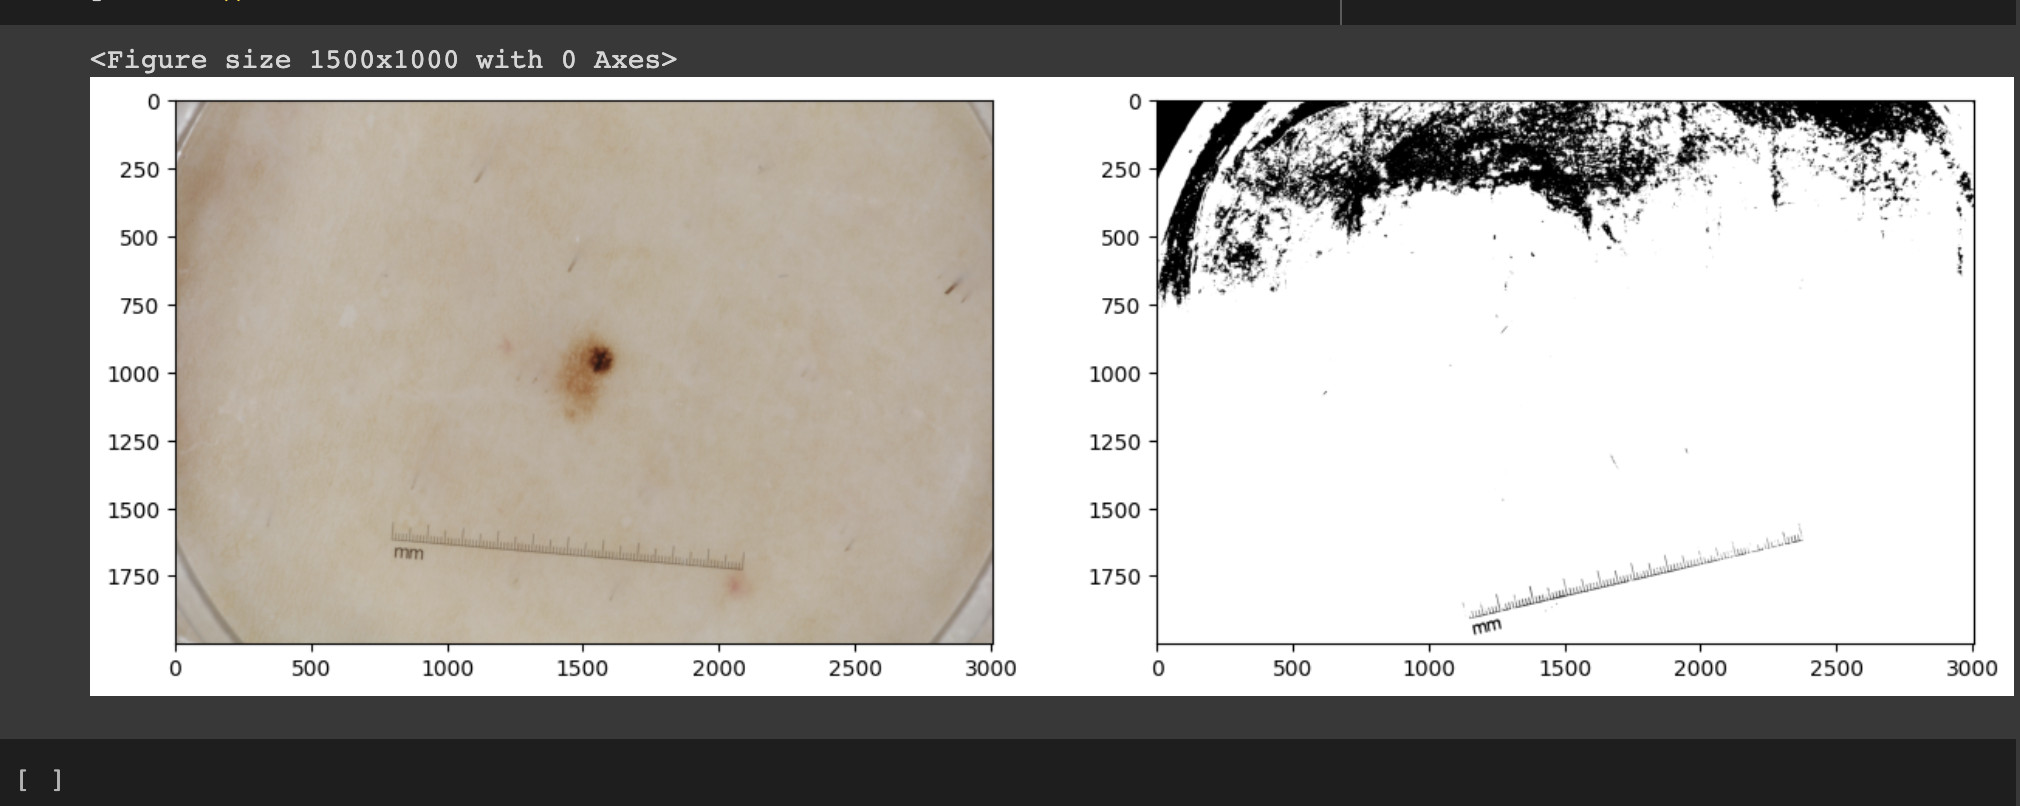

Nhận Xét Model: Có thể với cách em làm , việc cấu hình model và thời gian đào tạo, hoặc bản chất model không phù hợp với baì toán để ra